In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.svm import SVC

In [2]:
train = []
with open('features.train', 'r') as f:
    for line in f:
        train.append([float(i) for i in line.split()])
train = np.array(train)

In [3]:
x = []
y = []

for i in train:
    digit, intensity, symmetry = i[0], i[1], i[2]
    if digit == 8:
        y.append(1)
    else:
        y.append(-1)
    x.append([intensity, symmetry])

x = np.array(x)
y = np.array(y)

In [4]:
C = [10**i for i in [-5, -3, -1, 1, 3]]
print (C)

[1e-05, 0.001, 0.1, 10, 1000]


In [5]:
n_support_vectors = []
for i in C:
    # fit the model, don't regularize for illustration purposes
    clf = SVC(kernel='poly', C=i, degree=2, coef0=1, gamma=1)
    clf.fit(x, y)
    n_support_vectors.append(len(clf.support_))

In [6]:
print (n_support_vectors)

[1092, 1688, 1615, 1120, 1087]


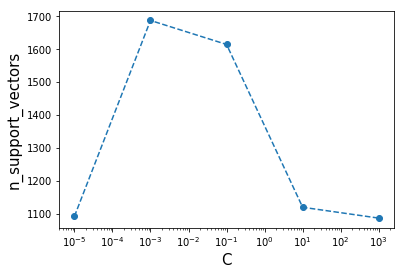

In [7]:
plt.semilogx(C, n_support_vectors, '--o')
plt.ylabel('n_support_vectors', fontsize = 15)
plt.xlabel('C', fontsize = 15)
plt.savefig('13.png')
plt.show()